In [1]:
from os.path import join as pjoin
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Bug!

Accuracies are consistently below chance (across all tested k). 

**I must have done something wrong**

In [2]:
results_path = '/data/BnB_USER/oliver/somato/scratch/digit_classification'
ks = [3,5,10,20,50,100]
npy_files = [
    pjoin(results_path, 'accuracies_k%i.npy' % k)
    for k in ks]
#print(npy_files)

In [3]:
# put results in one single data frame
dfs = []
for k, npy_file in zip(ks, npy_files):
    arr = np.load(npy_file)  # load npy file
    av = np.average(arr, axis=2)  # average accuracies across fingers
    flat = av.flatten()  # flatten for two runs --> 24 entries
    df = pd.DataFrame()
    df['acc'] = flat
    df['k'] = k
    df['training_run'] = [1]*12 + [2]*12
    dfs.append(df)
df = pd.concat(dfs)

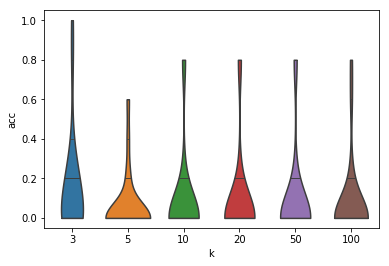

In [4]:
sns.violinplot(data=df, x='k', y='acc', inner="stick", cut=0)

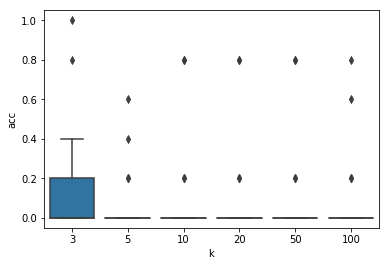

In [5]:
sns.boxplot(data=df, x='k', y='acc')

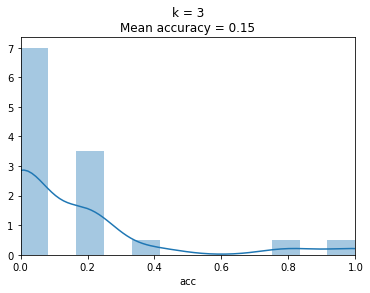

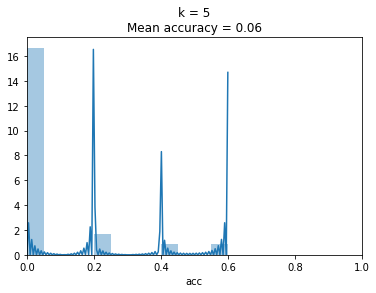

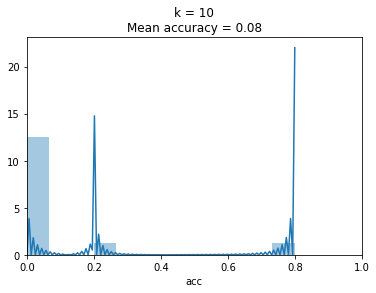

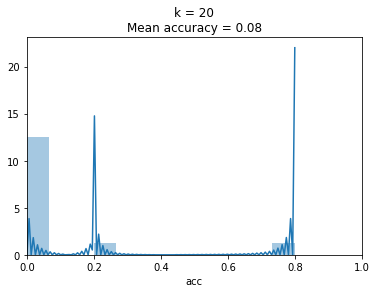

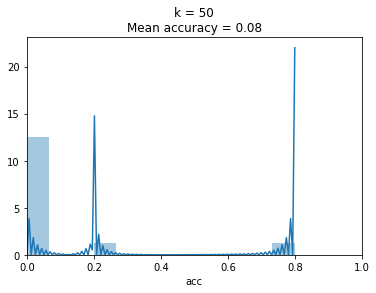

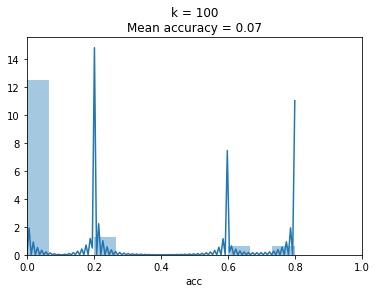

In [6]:
for k in ks:
    df_k = df[df['k']==k]
    g = sns.distplot(df_k['acc'], bins=12)
    g.set_title('k = %i\nMean accuracy = %.2f' %(k, np.mean(df_k['acc'])))
    g.set_xlim([0,1])
    plt.show()